## Python statistics essential training - 03_07_proportions

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
smoking = pd.read_csv('whickham.csv')

In [5]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

In [8]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [9]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'Smoker')

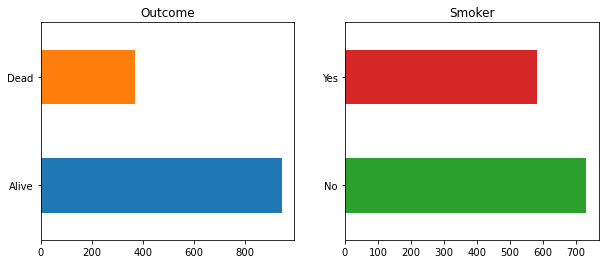

In [15]:
# make plots of simpson's paradox
#first look at all the data
pp.figure(figsize=(10,4))
pp.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='barh', color=['C0','C1']); pp.title('Outcome')
pp.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='barh', color=['C2','C3']); pp.title('Smoker')

Text(0.5, 1.0, 'smoker')

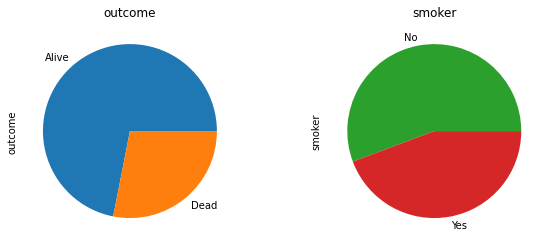

In [16]:
#same data shown as piechart
pp.figure(figsize=(10,4))
pp.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='pie',colors=['C0','C1']); pp.title('outcome')
pp.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='pie',colors=['C2','C3']); pp.title('smoker')

In [17]:
# data by smoker y/n
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

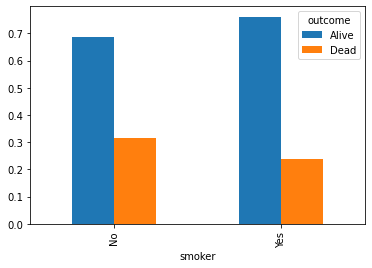

In [20]:
# unstacked smoker df plotted
bysmoker.unstack().plot(kind='bar')

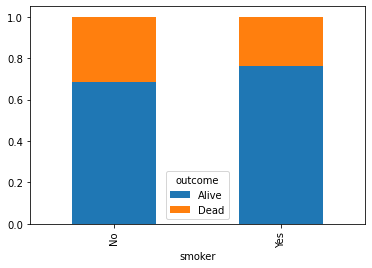

In [21]:
# stack the bars to clearly see this says smoking improves outcome
bysmoker.unstack().plot(kind='bar', stacked=True)


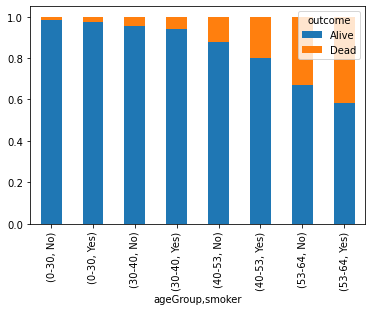

In [22]:
# data by age
byage.unstack().plot(kind='bar', stacked=True)

In [24]:
# look at df to find a simpler plot
byage.unstack()

outcome             Alive      Dead
ageGroup smoker                    
0-30     No      0.981818  0.018182
         Yes     0.975610  0.024390
30-40    No      0.955224  0.044776
         Yes     0.940678  0.059322
40-53    No      0.876106  0.123894
         Yes     0.802395  0.197605
53-64    No      0.669291  0.330709
         Yes     0.580645  0.419355

In [26]:
# drop dead column and unstack further
byage2 = byage.unstack().drop("Dead", axis=1).unstack()
byage2

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [28]:
#restructure labels 
byage2.columns = ['No', 'Yes']
byage2.columns.name = "smoker"
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


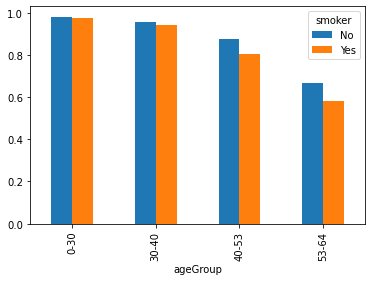

In [29]:
# plot the clean df, for every age group nonsmokers have better outcome
byage2.plot(kind='bar')